# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_tsne = pd.read_csv('./output/df_mhc.csv',sep=',',index_col=0)

In [3]:
cols = [col for col in df_tsne.columns.values if col != "Periods"]
X = df_tsne[cols]
y = df_tsne["Periods"]

In [4]:
X = StandardScaler().fit_transform(X)

### KMeans

In [5]:
%%time
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print('Silhouette Score for 4 clusters:', (silhouette_score(X, kmeans.predict(X))))

Silhouette Score for 4 clusters: 0.4966219975941122
CPU times: user 9.44 s, sys: 3.25 s, total: 12.7 s
Wall time: 7.11 s


In [6]:
X = pd.DataFrame(X,columns=['DayWeek', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007', 'M009',
                            'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M018', 'M020',
                            'M021', 'M022', 'M023', 'M024', 'M025', 'M026', 'M027', 'M028', 'M029',
                            'T002', 'P001', 'D001', 'D002', 'D003'])

In [7]:
X['labels'] = kmeans.labels_

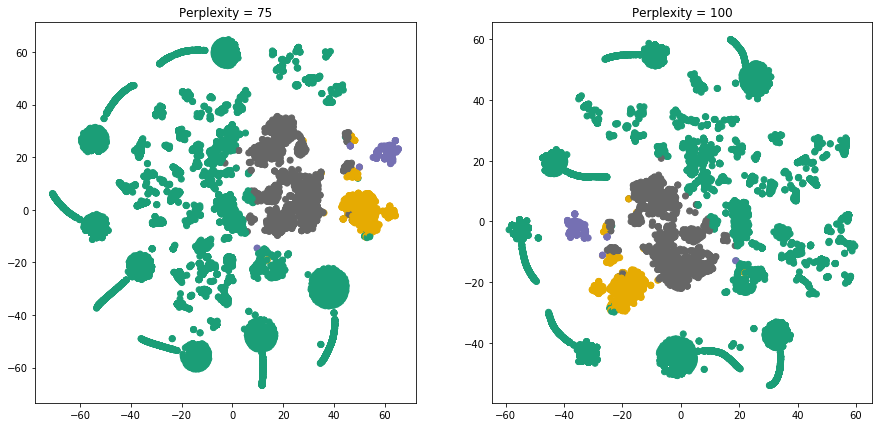

CPU times: user 9min 9s, sys: 28.4 s, total: 9min 38s
Wall time: 9min 35s


In [8]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i, perp in enumerate([75,100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X.labels, cmap='Dark2')
    ax[i].set_title("Perplexity = {}".format(perp))
plt.savefig('tsne_kmeans.png')
plt.show()

In [ ]:
#sns.set(style="ticks")
#sns.pairplot(X,hue='labels')

### Agglomerative Clustering 

In [9]:
%%time
aggloclust = AgglomerativeClustering(n_clusters=4)
aggloclust.fit(X)
#print('Silhouette Score for Agglomerative Clustering:', (silhouette_score(X, aggloclust.predict(X))))

CPU times: user 15.1 s, sys: 1.12 s, total: 16.3 s
Wall time: 16.6 s


In [10]:
X = pd.DataFrame(X,columns=['DayWeek', 'M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007', 'M009',
                            'M010', 'M011', 'M012', 'M013', 'M014', 'M015', 'M016', 'M018', 'M020',
                            'M021', 'M022', 'M023', 'M024', 'M025', 'M026', 'M027', 'M028', 'M029',
                            'T002', 'P001', 'D001', 'D002', 'D003'])

In [11]:
X['labels'] = aggloclust.labels_

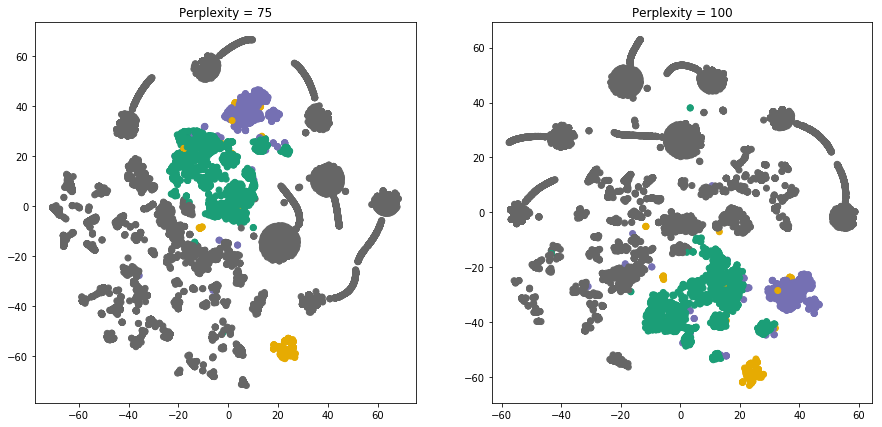

CPU times: user 8min 57s, sys: 27.3 s, total: 9min 24s
Wall time: 9min 22s


In [12]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i, perp in enumerate([75, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X.labels, cmap='Dark2')
    ax[i].set_title("Perplexity = {}".format(perp))
plt.savefig('tsne_aggloclust.png')
plt.show()

In [ ]:
#sns.set(style="ticks")
#sns.pairplot(X,hue='labels')